## Task 1

In [123]:
# import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from glob import glob
import os

In [107]:
# This code adjusts the figure size of seaborn plots to 10 inches by 6 inches
sns.set(rc={'figure.figsize':(10,6)})

In [108]:
''' 
This code creates a list called "topics" and populates
it with directories from the "Reuters_Dataset/training" folder
that contain fewer than or equal to 10 files.
'''
topics = []
for subset in glob('Reuters_Dataset/training/*'):
    topic = os.listdir(subset)
    if len(topic)<=10:
        topics.append(subset)

In [109]:
'''
This code reads text files from the directories specified in the "topics" 
list and appends their content to "train_corpus" while extracting labels from
the directory names and appending them to "train_labels".
'''
train_corpus = []
train_labels = []

for topic in topics:
    for file in glob(topic+'/*'):
        data = open(file)
        text = data.read()
        train_corpus.append(text)
        train_labels.append(topic.split('\\')[1])

In [110]:
'''
This code reads text files from the directories specified in the "topics"
list (with "training" replaced by "test") and appends their content to 
"test_corpus". It also extracts labels from the directory names and appends
them to "test_labels".
'''
test_corpus = []
test_labels = []

for topic in topics:
    topic = re.sub(r'training','test',topic)
    for file in glob(topic+'/*'):
        data = open(file)
        text = data.read()
        test_corpus.append(text)
        test_labels.append(topic.split('\\')[1])

# Cleaning

In [111]:
'''
This code defines a function called "clean_text" that performs various text cleaning operations.
It converts the text to lowercase, replaces underscores with spaces, removes mentions
(starting with "@"), removes hashtags (keeping only the text after "#"), expands contractions
(e.g., "he's" to "he is"), replaces special characters and punctuation with spaces, removes digits,
removes single-letter words, removes excessive whitespace, and finally, strips any leading or
trailing whitespace before returning the cleaned text.
'''
def clean_text(text):
    text = text.lower()
    text = re.sub(r'_', ' ', text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    text = re.sub(r"i'm", 'i am', text)
    text = re.sub(r"he's", 'he is', text)
    text = re.sub(r"she's", 'she is', text)
    text = re.sub(r"what's", 'what is', text)
    text = re.sub(r"where's", 'where is', text)
    text = re.sub(r"\'ll", 'will', text)
    text = re.sub(r"\'ve", 'have', text)
    text = re.sub(r"\'re", 'are', text)
    text = re.sub(r"\'d", 'had', text)
    text = re.sub(r"\n't", 'not', text)
    text = re.sub(r"[-()\"#/@;:<>`{}+=~|.!?,]", ' ', text)
    text = re.sub(r'[^\w\s]',' ', text)
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'^[a-z]\s+', ' ', text)
    text = re.sub(r'\s+[a-z]\s+',' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [112]:
'''
Function called "remove_stopwords" that takes a text input and removes the stopwords
(common words that typically do not add significant meaning to the text) using the NLTK library.
It tokenizes the text into words, filters out the stopwords, joins the remaining words into
a string, and returns the result.
'''
def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    networds = [word for word in tokens if word not in stopwords.words('english')]
    networds = ' '.join(networds)
    return networds

In [113]:
'''
This code iterates over the elements of the "train_corpus" and "test_corpus" lists,
applies a series of text cleaning operations (cleaning, removing stopwords)
to each text element, and then updates the corresponding element in the list with the
cleaned and processed text.
'''
for e, txt in enumerate(train_corpus):
    txt = clean_text(txt)
    txt = remove_stopwords(txt)
    train_corpus[e] = txt
    
for e, txt in enumerate(test_corpus):
    txt = clean_text(txt)
    txt = remove_stopwords(txt)
    test_corpus[e] = txt

# Statistics

### Dimensionality and Sparsity

In [114]:
'''
This code creates a TfidfVectorizer object with a minimum document frequency of 4
(meaning terms must appear in at least 4 documents to be considered). It fits the vectorizer
on the combined "train_corpus" and "test_corpus" texts. It transforms the text data into a matrix
of TF-IDF (Term Frequency-Inverse Document Frequency) features (X) and retrieves the feature names
(words) using the vectorizer's "get_feature_names()" method.
'''
vectorizer = TfidfVectorizer(min_df=4)
X = vectorizer.fit_transform(train_corpus+test_corpus)
feature_names = vectorizer.get_feature_names()

C:\Users\Prince\miniconda3\envs\aimbot\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [115]:
# Print the dimensions of the TF-IDF matrix
print("Dimensions of TF-IDF matrix: ", X.shape)

# Print the number of unique words in the corpus
print("Number of unique words: ", len(feature_names))

# Print the sparsity of the TF-IDF matrix
sparsity = 1.0 - (X.nnz / (X.shape[0] * X.shape[1]))
print("Sparsity of TF-IDF matrix: ", sparsity)

Dimensions of TF-IDF matrix:  (207, 1151)
Number of unique words:  1151
Sparsity of TF-IDF matrix:  0.9510822347297246


### WordCloud

In [116]:
from wordcloud import WordCloud, STOPWORDS

In [117]:
'''
This code converts the combined "train_corpus" and "test_corpus" into a single string by
concatenating all the texts together with a space separator. The resulting string is then
used as input for further processing. Additionally, the code creates a set called "STOPWORDS"
which likely contains stop words for text analysis purposes.
'''
STOPWORDS = set(STOPWORDS)
string = pd.Series(train_corpus+test_corpus).str.cat(sep=' ')

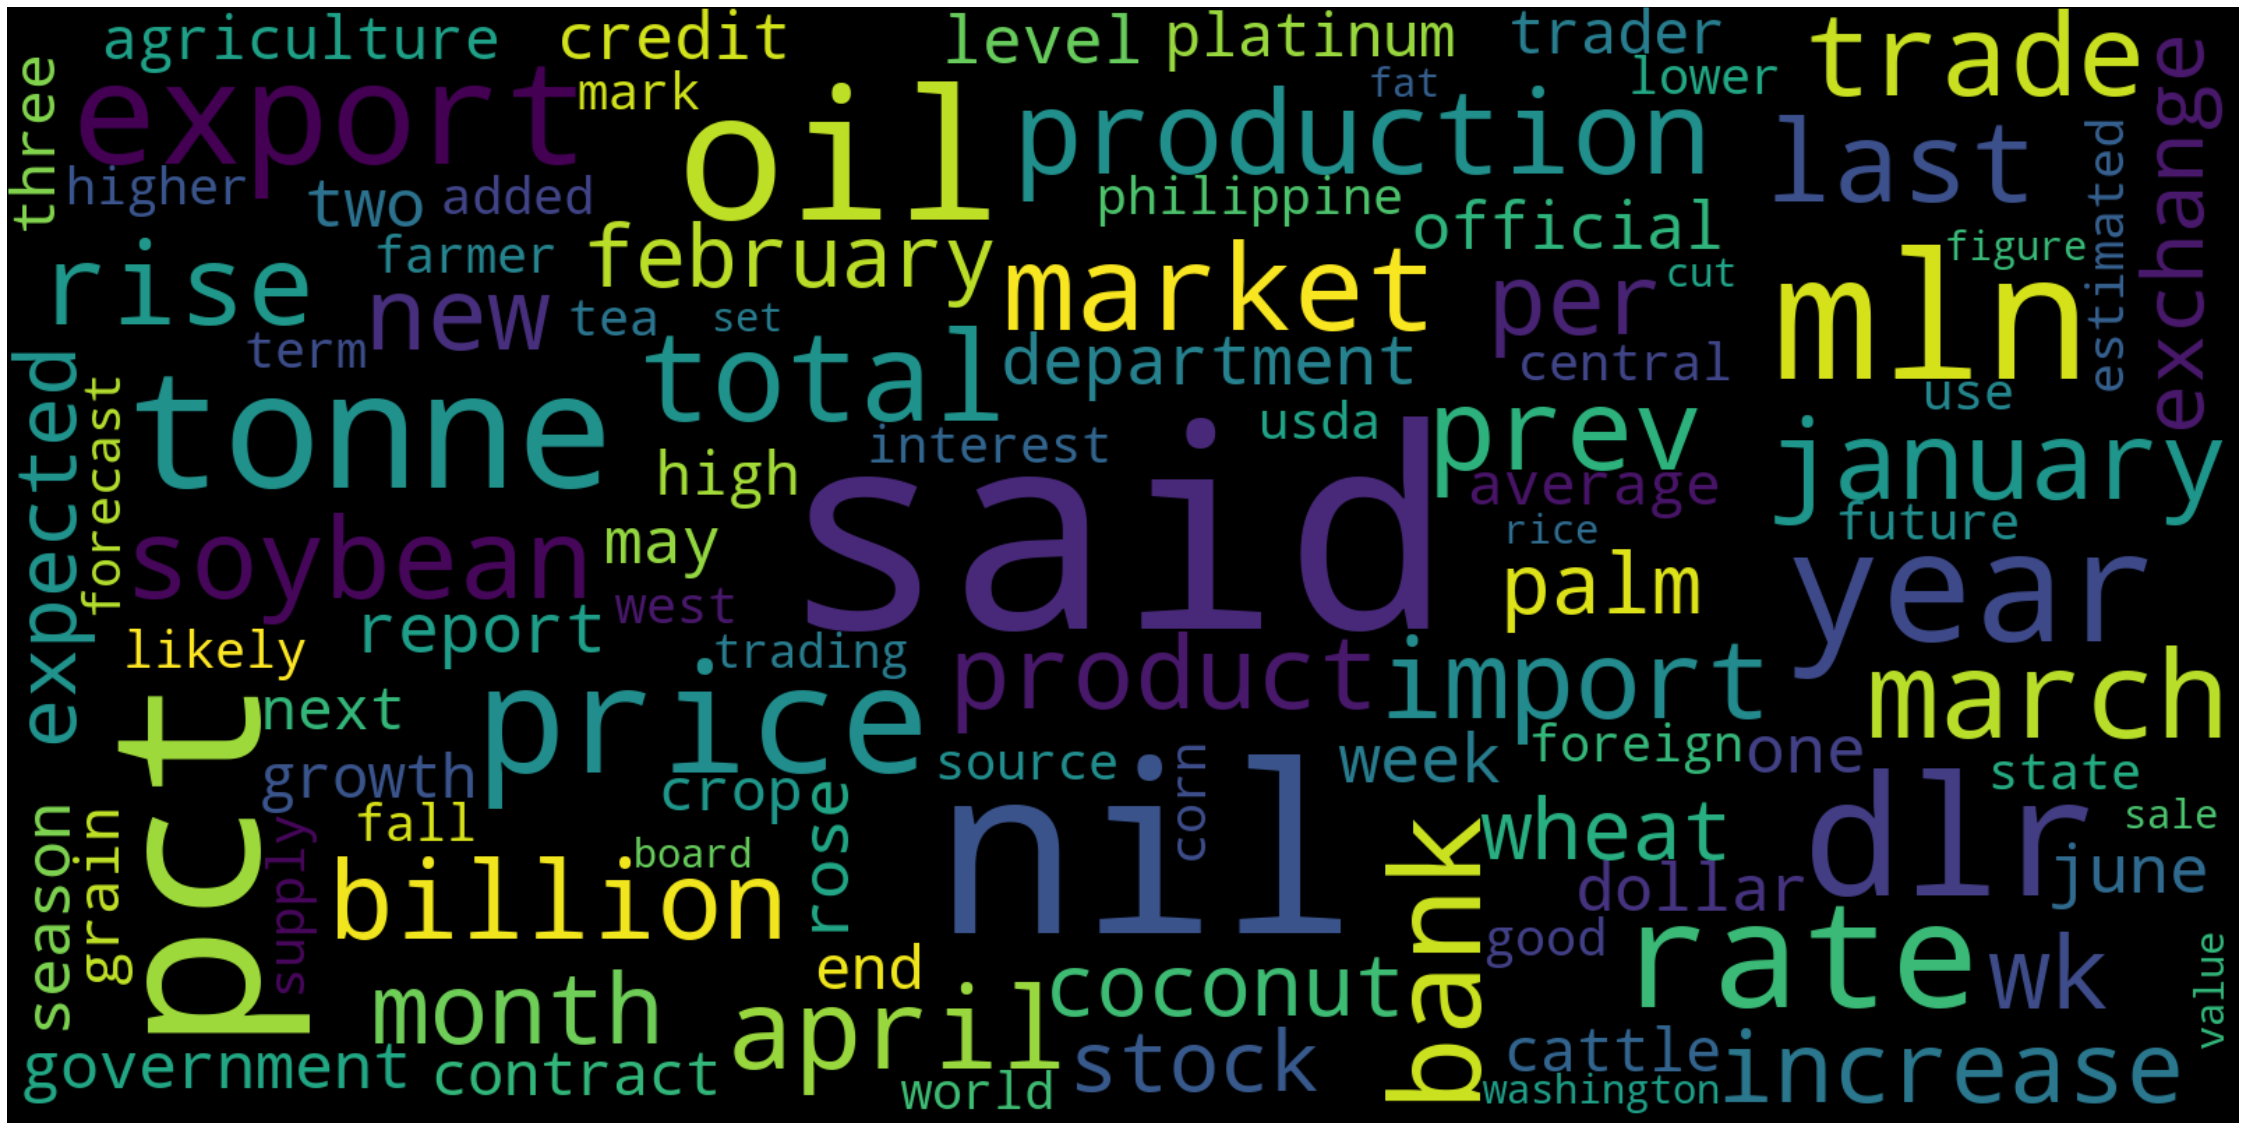

In [122]:
'''
This code generates a word cloud visualization using the WordCloud library. The word cloud is
created with a specified width, height, maximum font size, and maximum number of words to display.
It uses the set of stopwords defined earlier to filter out common words. The word cloud is displayed
with a black background color and without showing the axis. The resulting visualization is shown using
matplotlib's plt.imshow() and plt.show() functions, with a custom figure size.
'''
wordcloud = WordCloud(width=1600,
                     stopwords=STOPWORDS, height=800, max_font_size=200, max_words=100,
                     collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Similarity

In [161]:
'''
This code splits the TF-IDF matrix X into training and test sets by extracting the corresponding
rows. It then computes the cosine similarity matrix using the training set, specifically on the
rows that correspond to unique labels. The resulting similarity matrix will measure the pairwise
cosine similarity between the training samples based on their TF-IDF representations.
'''
train_x = X[:127].toarray()
test_x = X[127:].toarray()

names, indexes = np.unique(labels,return_index=True)

similarity_matrix = cosine_similarity(train_x[indexes])

In [155]:
# Find the similarity between the first and second document
similarity_score = similarity_matrix[0][1]
print("Similarity score between document 1 and document 2:", similarity_score)
similarity_score = similarity_matrix[1][19]
print("Similarity score between document 2 and document 20:", similarity_score)

Similarity score between document 1 and document 2: 0.2094686149534109
Similarity score between document 2 and document 20: 0.022491547686581424


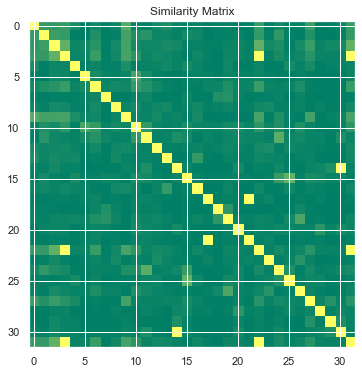

In [151]:
# Plot the similarity matrix as a heatmap with matrix values
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='summer', interpolation='nearest')
plt.title('Similarity Matrix')
plt.show()

# Classification

In [225]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

In [220]:
label_names = le.classes_

In [221]:
'''
This code defines a function called "report" that evaluates a trained model on a validation set.
It prints a classification report, including precision, recall, F1-score, and accuracy. It also
displays a confusion matrix visualization using matplotlib. The function takes two arguments: the
predicted labels and the true labels.
'''
def report(prediction, y_true):
    print('        ----------Classification Report Of Classes-------------')
    print(classification_report(y_true,prediction,target_names=label_names))
    print('\n        ----------Validation Data------------------')
    print('Accuarcy:',accuracy_score(y_true, prediction)* 100)
    print('Precision: {:,.2f} %'.format(precision_score(y_true, prediction, average='weighted') * 100))
    print('Recall-score: {:,.2f}'.format(recall_score(y_true, prediction, average='weighted') * 100))
    print('F1-score: {:,.2f}'.format(f1_score(y_true, prediction, average='weighted') * 100))
    cm = confusion_matrix(y_true,prediction)
    print('\n-----------Confusion Matrix------------\n')
    print(cm)
    
    plt.figure(figsize=(15,12))
    plt.imshow(cm , cmap= plt.cm.Blues_r)
    plt.colorbar()
    tick_marks = np.arange(len(label_names))
    plt.xticks(tick_marks,label_names, rotation = 90)
    plt.yticks(tick_marks,label_names)
    thresh = cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i,j],'.2f'), ha='center', va='center',
                     color='black' if cm[i,j] > thresh else 'white')
    plt.show()

In [239]:
# in BOW, columns of vocubulory is created and if that vocab word is in sentence
# then its frequency is added as value
#
vectorizer = CountVectorizer(max_features=500,min_df=4)
X = vectorizer.fit_transform(train_corpus+test_corpus)
X.shape

(207, 500)

In [241]:
train_x = X[:127].toarray()
test_x = X[127:].toarray()

In [264]:
# Create an instance of MultinomialNB classifier
classifier = MultinomialNB(alpha=1.0)
# Train the classifier using the document-term matrix and corresponding labels
classifier.fit(train_x, train_labels)

MultinomialNB()

        ----------Classification Report Of Classes-------------
               precision    recall  f1-score   support

   castor-oil       0.00      0.00      0.00         1
      coconut       0.33      0.50      0.40         2
  coconut-oil       0.29      0.67      0.40         3
   copra-cake       0.00      0.00      0.00         1
   cotton-oil       0.00      0.00      0.00         2
          cpu       1.00      1.00      1.00         1
          dfl       0.14      1.00      0.25         1
          dmk       0.00      0.00      0.00         4
    groundnut       1.00      0.25      0.40         4
groundnut-oil       0.00      0.00      0.00         1
       income       1.00      0.86      0.92         7
  instal-debt       0.50      1.00      0.67         1
          jet       0.00      0.00      0.00         1
     l-cattle       1.00      0.50      0.67         2
      lin-oil       0.00      0.00      0.00         1
       lumber       0.83      0.83      0.83         6


C:\Users\Prince\miniconda3\envs\aimbot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prince\miniconda3\envs\aimbot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prince\miniconda3\envs\aimbot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prin

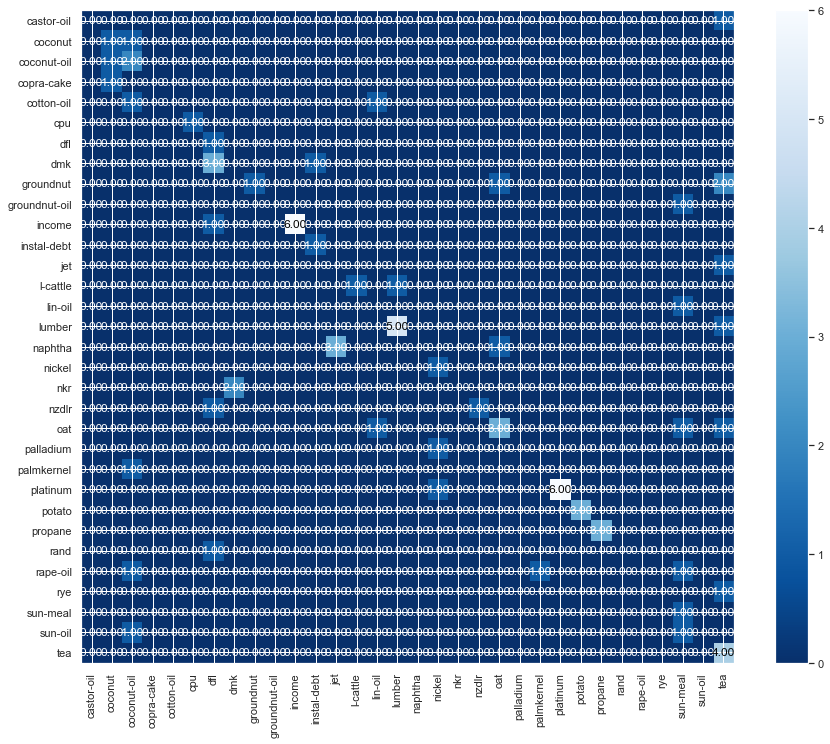

In [265]:
'''
This code uses a trained classifier to make predictions on the test set (test_x) and then calls
the "report" function to evaluate the predictions by comparing them to the true labels (test_labels).
The function generates a classification report, prints various evaluation metrics, and displays a
confusion matrix visualization.
'''
result = classifier.predict(test_x)
report(result, test_labels)